In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
movies = pd.read_csv('moviesData.csv')

In [120]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        600 non-null    int64  
 1   title             600 non-null    object 
 2   title_type        600 non-null    object 
 3   genre             600 non-null    object 
 4   runtime           599 non-null    float64
 5   mpaa_rating       600 non-null    object 
 6   studio            595 non-null    object 
 7   thtr_rel_year     600 non-null    int64  
 8   thtr_rel_month    600 non-null    int64  
 9   thtr_rel_day      600 non-null    int64  
 10  dvd_rel_year      593 non-null    float64
 11  dvd_rel_month     593 non-null    float64
 12  dvd_rel_day       593 non-null    float64
 13  imdb_rating       600 non-null    float64
 14  imdb_num_votes    600 non-null    int64  
 15  critics_rating    600 non-null    object 
 16  critics_score     600 non-null    int64  
 1

In [121]:
movies.shape

(600, 31)

In [122]:
movies.head()

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover


In [123]:
# Preprocessing
movies = movies.iloc[:,1:]

In [124]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             600 non-null    object 
 1   title_type        600 non-null    object 
 2   genre             600 non-null    object 
 3   runtime           599 non-null    float64
 4   mpaa_rating       600 non-null    object 
 5   studio            595 non-null    object 
 6   thtr_rel_year     600 non-null    int64  
 7   thtr_rel_month    600 non-null    int64  
 8   thtr_rel_day      600 non-null    int64  
 9   dvd_rel_year      593 non-null    float64
 10  dvd_rel_month     593 non-null    float64
 11  dvd_rel_day       593 non-null    float64
 12  imdb_rating       600 non-null    float64
 13  imdb_num_votes    600 non-null    int64  
 14  critics_rating    600 non-null    object 
 15  critics_score     600 non-null    int64  
 16  audience_rating   600 non-null    object 
 1

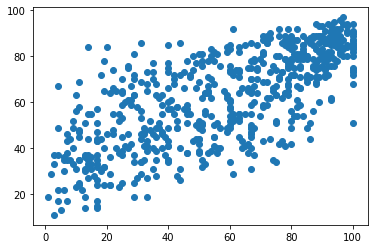

In [125]:
plt.scatter(movies["critics_score"],movies["audience_score"])


In [126]:
x = movies.iloc[:,15:16]

In [127]:
y = movies.iloc[:,17:18]


In [128]:
from sklearn.model_selection import train_test_split
x_train_set , x_test_set , y_train_set , y_test_set = train_test_split(x,y,test_size = 0.1)

In [129]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(x_train_set,y_train_set)

LinearRegression()

In [130]:
predict_y = regr.predict(x_test_set)


In [131]:
# Analysis 

In [139]:
regr.coef_ #weight

array([[0.50905243]])

In [140]:
regr.intercept_ #intercept

array([32.84135383])

In [133]:
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
print("Mean squared error: %.2f" % mean_squared_error(y_test_set, y_pred=predict_y))

Mean squared error: 222.42


In [135]:
print("Coefficient of determination: %.2f" % r2_score(y_test_set, y_pred=predict_y))

Coefficient of determination: 0.46


In [136]:
predict_y = predict_y.astype(int)
x_test_set = x_test_set.to_numpy()

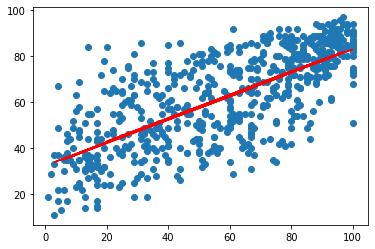

In [137]:
# plot

plt.scatter(x,y)
plt.plot(x_test_set,predict_y,color = 'r')

In [141]:
import pickle

pickle.dump(regr,open('model2.pkl','wb'))